In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
cred_df = pd.read_csv("credit.csv")
cred_df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
cred_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_loan_duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
percent_of_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
years_at_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_loans_count,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [4]:
cred_df.shape

(1000, 17)

In [5]:
cred_df.describe(include=[np.number])

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
# Converting categorical cols into numerical

for feature in cred_df.columns:
    if cred_df[feature].dtype == 'object':
        cred_df[feature] = pd.Categorical(cred_df[feature]).codes

In [8]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

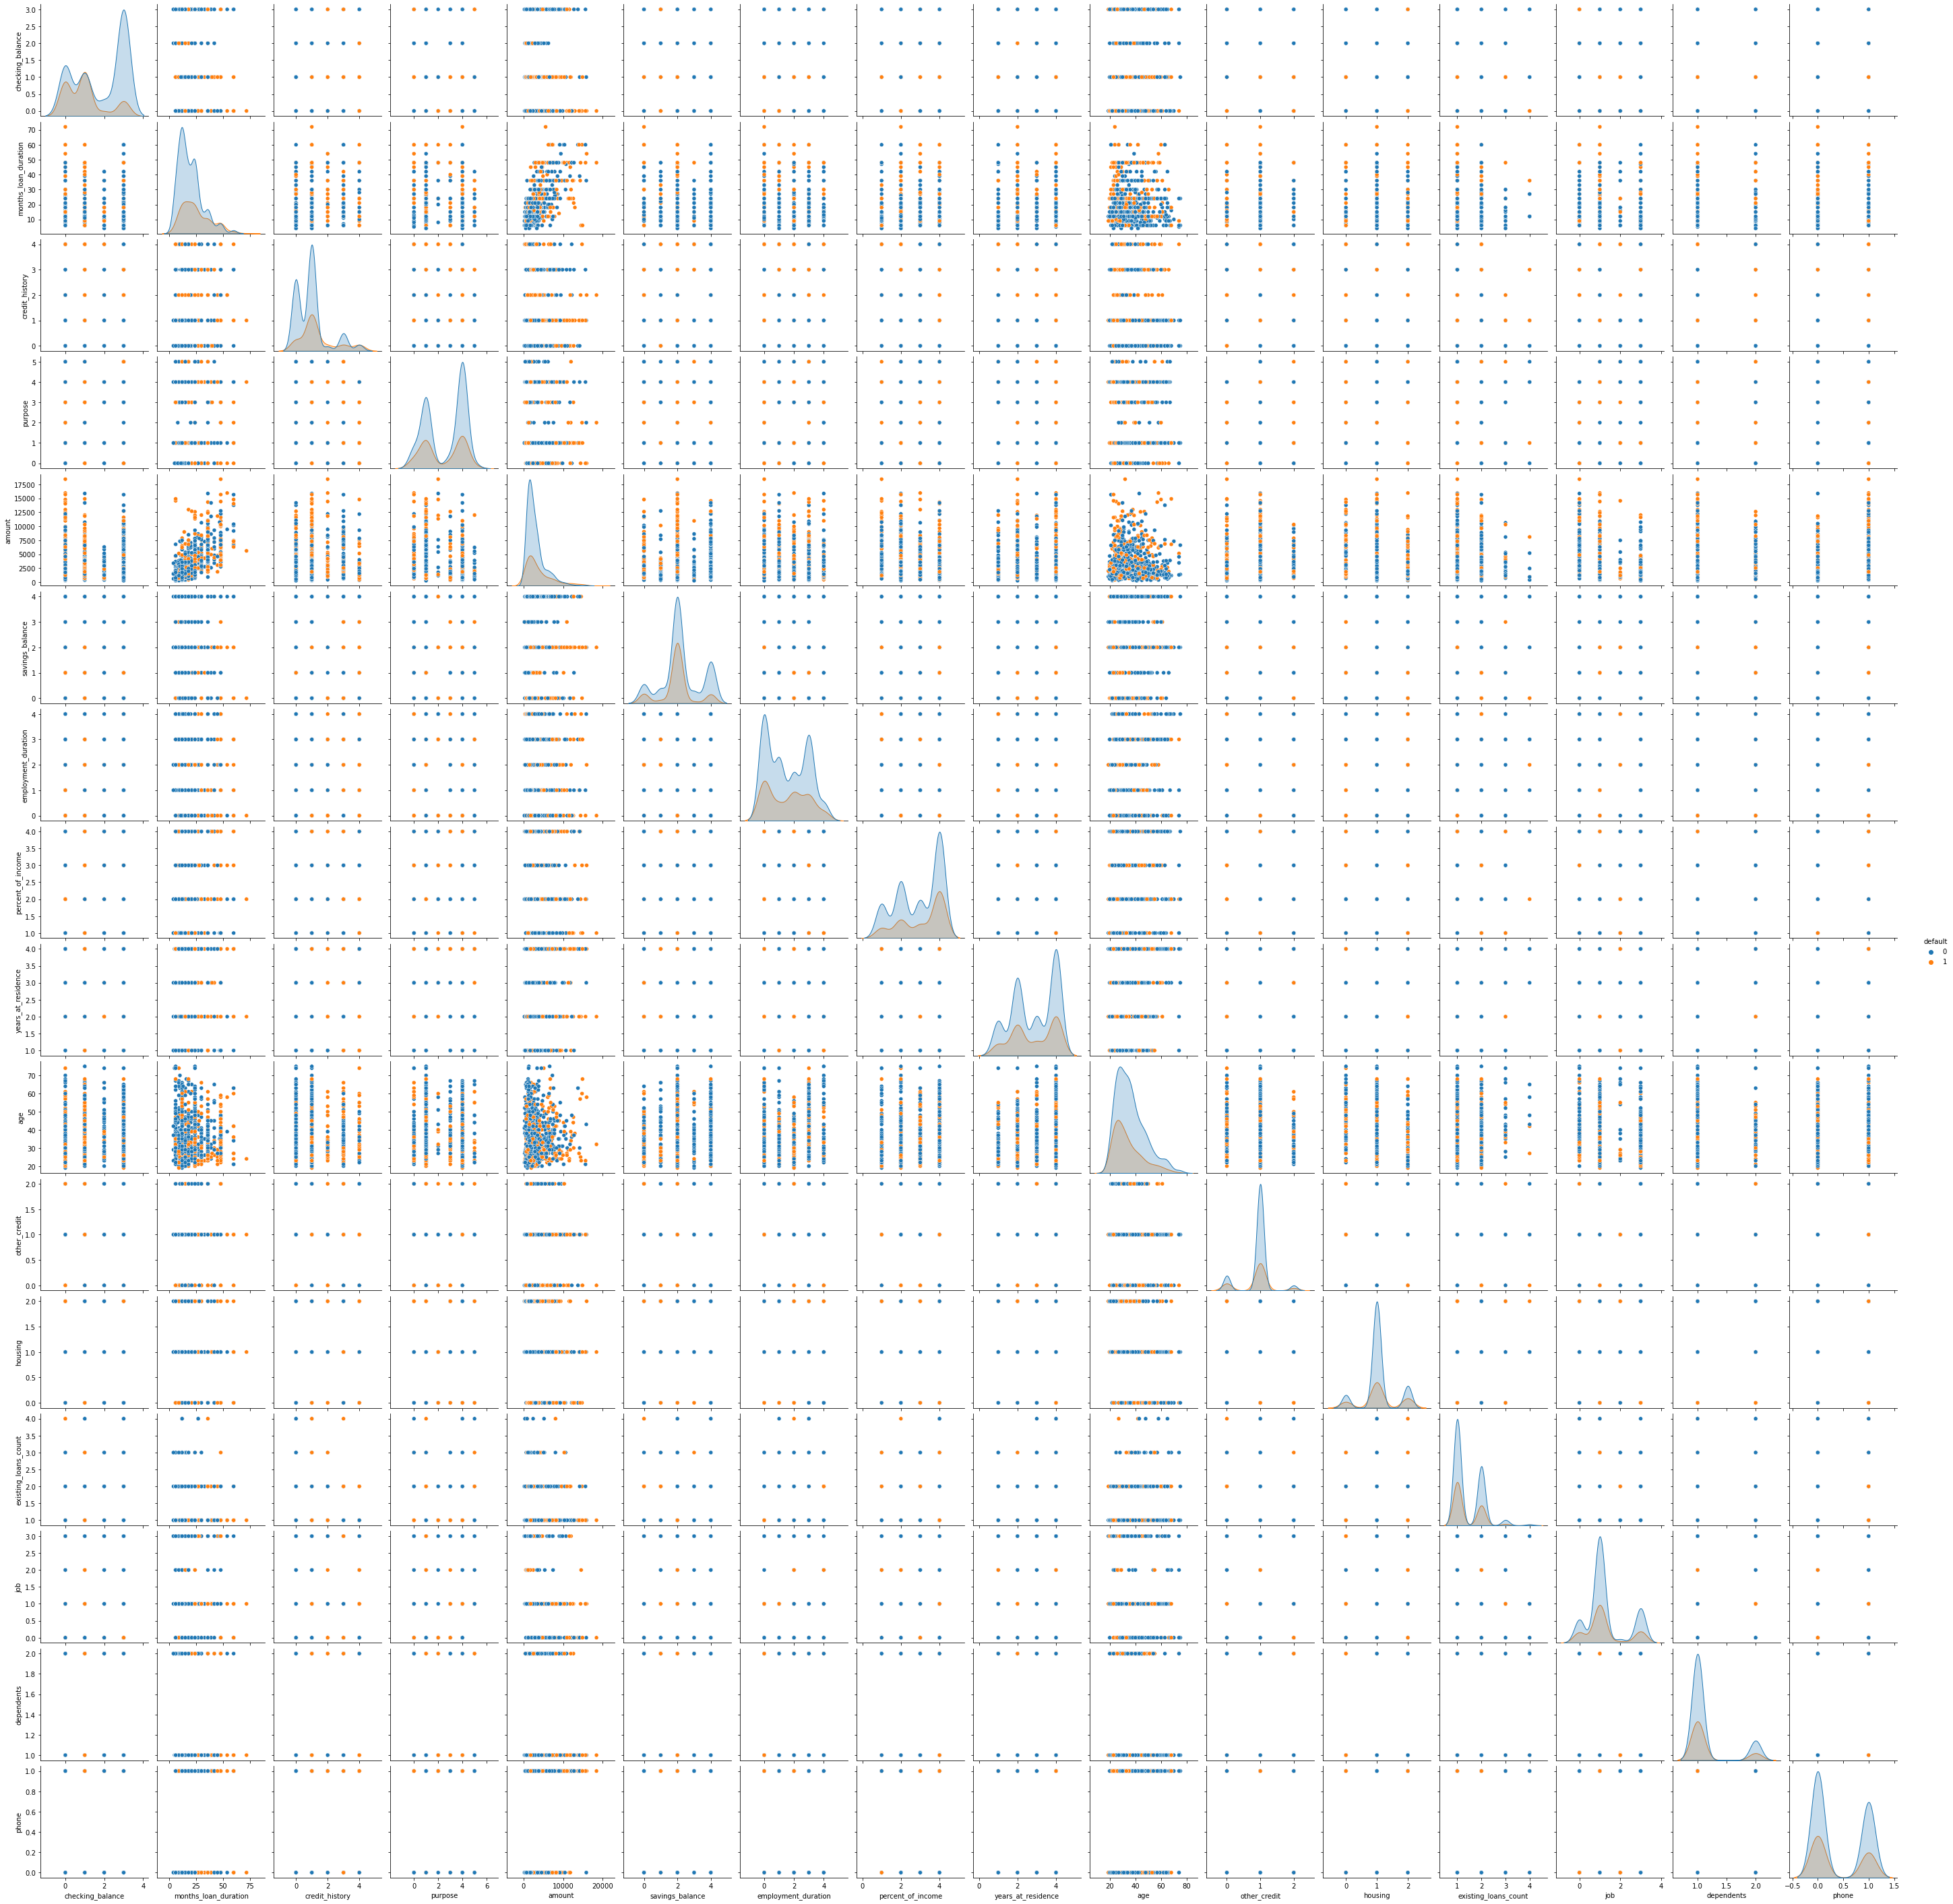

In [9]:
# Pairplot using sns
sns.pairplot(cred_df, hue = "default")

In [10]:
col_labels = [ 'checking_balance', 'months_loan_duration' ,'credit_history' , 'purpose, amount', 'savings_balance' , 'employment_duration'
, 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone', 'default']

In [11]:
train_char_label = ['No', 'Yes']

In [12]:
# capture the target column ("default") into separate vectors for training set and test set
X = cred_df.drop("default" , axis=1)
y = cred_df.pop("default")

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [19]:
dtc = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)

In [20]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=100)

In [22]:
from IPython.display import Image
from sklearn import tree
from os import system

Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dtc, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

print(pd.DataFrame(dtc.feature_importances_, columns = ["Imp"], index = X_train.columns))

                           Imp
checking_balance      0.301271
months_loan_duration  0.070886
credit_history        0.103628
purpose               0.088180
amount                0.178971
savings_balance       0.070814
employment_duration   0.000000
percent_of_income     0.049231
years_at_residence    0.000000
age                   0.047855
other_credit          0.075236
housing               0.000000
existing_loans_count  0.013929
job                   0.000000
dependents            0.000000
phone                 0.000000


In [24]:
y_predict = dtc.predict(X_test)

In [25]:
print(dtc.score(X_train , y_train))
print(dtc.score(X_test , y_test))

0.7885714285714286
0.7466666666666667


In [26]:
print(metrics.confusion_matrix(y_test, y_predict))

[[195  19]
 [ 57  29]]


#                             Ensemble Learning - Bagging

In [27]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(base_estimator=dtc, n_estimators=50)
bgc = bgc.fit(X_train, y_train)

In [28]:
y_predict = bgc.predict(X_test)
print(bgc.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.75
[[193  21]
 [ 54  32]]


# Ensemble Learning - AdaBoosting

In [29]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=10)
abc = abc.fit(X_train, y_train)

In [30]:
y_predict = abc.predict(X_test)
print(abc.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.63
[[158  56]
 [ 55  31]]
